In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
            "logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
            "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
            "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
            "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
            "dst_host_srv_rerror_rate","result"]
print(len(colnames))


42


In [3]:
#loading data
train = pd.read_csv(r"C:\Users\Admin\Desktop\feature selection\datasets\kddcup 1999\kddcup_data_corrected.csv",header=None,names=colnames)
#print(type(train))
#test = pd.read_csv(r"C:\Users\Admin\Desktop\feature selection\datasets\kddcup 1999\corrected.csv")


In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
#print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1048576 rows and 42 columns
----------------------------


In [6]:
train.result.value_counts()

normal.             595798
smurf.              227524
neptune.            204815
ipsweep.              7579
satan.                5393
portsweep.            2782
nmap.                 2316
back.                 2002
teardrop.              199
guess_passwd.           53
pod.                    40
warezmaster.            20
land.                   17
imap.                   12
ftp_write.               8
multihop.                6
buffer_overflow.         5
phf.                     3
loadmodule.              2
perl.                    2
Name: result, dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1048576 non-null  int64  
 1   protocol_type                1048576 non-null  object 
 2   service                      1048576 non-null  object 
 3   flag                         1048576 non-null  object 
 4   src_bytes                    1048576 non-null  int64  
 5   dst_bytes                    1048576 non-null  int64  
 6   land                         1048576 non-null  int64  
 7   wrong_fragment               1048576 non-null  int64  
 8   urgent                       1048576 non-null  int64  
 9   hot                          1048576 non-null  int64  
 10  num_failed_logins            1048576 non-null  int64  
 11  logged_in                    1048576 non-null  int64  
 12  num_compromised              1048576 non-n

In [8]:
#check missing values
train.columns[train.isnull().any()]
#print(len(train))
print(train.isnull().any())

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [9]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
if(miss.sum()==0.0):
    print(miss)
#print(train.isnull().sum())
else:
    miss = miss[miss > 0]
    miss.sort_values(inplace=True)
    miss
    print('missing values are'.format(miss))

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

In [10]:
#visualising missing values
#df = pd.DataFrame()
#df.to_frame()
#miss = pd.DataFrame()
#miss.drop_duplicates()
if(miss.sum()==0.0):
    print("There is no missing values")
    print(miss.head())
else:    
    miss.to_frame()
    miss.columns = ['count']
    miss.index.names = ['Name']
    miss['Name'] = miss.index

#plot the missing value count
#if(miss.columns!=0):
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Name', y = ['count'], data=miss)
#sns.boxplot, 'species', 'value', x='species', y='value')
    plt.xticks(rotation = 90)
    sns.plt.show()



There is no missing values
duration         0.0
protocol_type    0.0
service          0.0
flag             0.0
src_bytes        0.0
dtype: float64


In [11]:
# Descriptive statistics
train.describe()
#If there is any redundant column, remove it from both train & test datasets
#Since there is no zeros for all statistical values,it doesn't contain redundant column 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1048576.0,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06
mean,4.234529e+00,1.640730e+03,2.355018e+03,1.621246e-05,6.036758e-04,1.907349e-05,3.145885e-02,1.173019e-04,5.073900e-01,1.439762e-02,2.384186e-04,8.296967e-05,2.419853e-02,2.906799e-03,1.611710e-04,2.755165e-03,0.0,9.536743e-07,2.112389e-03,1.546366e+02,1.203271e+02,1.975607e-01,1.977609e-01,2.475420e-02,2.496099e-02,8.094793e-01,2.117072e-02,8.426697e-02,1.839691e+02,1.864760e+02,7.602534e-01,2.824197e-02,2.744349e-01,1.760540e-02,1.975058e-01,1.972018e-01,2.517304e-02,2.455191e-02
std,2.285165e+02,6.781544e+05,3.174638e+04,4.026440e-03,4.159995e-02,7.042070e-03,7.063307e-01,1.370621e-02,4.999456e-01,2.439982e+00,1.543898e-02,1.215783e-02,2.738431e+00,1.917875e-01,1.299133e-02,5.706872e-02,0.0,9.765625e-04,4.591218e-02,2.033122e+02,2.057385e+02,3.972186e-01,3.974836e-01,1.535523e-01,1.535197e-01,3.767900e-01,9.170193e-02,2.235659e-01,9.889551e+01,1.041205e+02,3.981472e-01,9.997035e-02,4.219412e-01,5.819577e-02,3.969704e-01,3.974174e-01,1.509611e-01,1.512144e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,7.500000e+01,5.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.480000e+02,1.210000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.800000e+01,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,1.398000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,2.610000e+02,3.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,5.200000e-01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [12]:
#I will be extracting all the features as a "priori" for preprocessing
features = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
            "logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
            "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
            "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
            "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
            "dst_host_srv_rerror_rate"]
target = "result"

In [13]:
X1 = train.loc[:,features]
y1 = train.loc[:,target]
train.shape
#test.shape

(1048576, 42)

In [14]:
classes = np.unique(y1)
print(classes)
# Attack Class Distribution
train['result'].value_counts()

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'satan.' 'smurf.' 'teardrop.'
 'warezmaster.']


normal.             595798
smurf.              227524
neptune.            204815
ipsweep.              7579
satan.                5393
portsweep.            2782
nmap.                 2316
back.                 2002
teardrop.              199
guess_passwd.           53
pod.                    40
warezmaster.            20
land.                   17
imap.                   12
ftp_write.               8
multihop.                6
buffer_overflow.         5
phf.                     3
loadmodule.              2
perl.                    2
Name: result, dtype: int64

In [15]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if classes[i] == "normal.":
        train = train.replace(classes[i], 0)
  #      data["Team"]= data["Team"].str.replace("boston", "New Boston", case = False) 
    else:
        train = train.replace(classes[i], 1)

#train

train["result"] = train["result"].replace(0, "normal")
train["result"] = train["result"].replace(1, "abnormal")

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal


In [16]:
# Attack Class Distribution
#print('0-normal \t 1-abnorml')
train['result'].value_counts()

normal      595798
abnormal    452778
Name: result, dtype: int64

In [17]:
#0 for normal data and 1 for abnormalities
train.result=train.result.apply(lambda x: 0 if x == 'normal' else 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
# Helper function for scaling continous values
def minmax_scale_values(train, col_name):
    scaler = MinMaxScaler()
    scaler = scaler.fit(train[col_name].values.reshape(-1, 1))
    train_values_standardized = scaler.transform(train[col_name].values.reshape(-1, 1))
    train[col_name] = train_values_standardized
    #test_values_standardized = scaler.transform(test[col_name].values.reshape(-1, 1))
    #test[col_name] = test_values_standardized
    
    
#Helper function for one hot encoding
def encode_text(train, name):
    training_set_dummies = pd.get_dummies(train[name])
    #testing_set_dummies = pd.get_dummies(test[name])
    for x in training_set_dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        train[dummy_name] = training_set_dummies[x]
        #if x in testing_set_dummies.columns :
        #    test[dummy_name]=testing_set_dummies[x]
        #else :
        #    test[dummy_name]=np.zeros(len(test))
    train.drop(name, axis=1, inplace=True)
    #test.drop(name, axis=1, inplace=True)
             
sympolic_columns=["protocol_type","service","flag"]
label_column="Class"
for column in train.columns :
    if column in sympolic_columns:
        encode_text(train,column)
    elif not column == label_column:
        minmax_scale_values(train, column)

In [19]:
#randomly sample 500 data point for training
train=train[train.result==1].sample(40000)

In [20]:
train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
539463,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272016,0.027397,1.0,1.0,0.0,0.0,0.10,0.06,0.0,1.0,0.054902,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
617692,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.573386,0.035225,1.0,1.0,0.0,0.0,0.06,0.06,0.0,1.0,0.070588,0.07,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
977073,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
445353,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
957178,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
train.shape

(40000, 119)

In [22]:
#randomly sample 500 data point for training
df_train=train

In [23]:
#remove the item sampled from our dataset
index_list=df_train.index
train=train.drop(index_list)

In [24]:
#drop the label columns
df_label=df_train.result
df_train=df_train.drop('result',axis=1)

In [25]:
df_label
df_label.to_csv('abnormallabel1.csv', index=False)

In [26]:
df_train.shape

(40000, 118)

In [27]:
df_train=df_train.values.reshape((df_train.shape[0], 1, df_train.shape[1]))

In [28]:
df_train.shape

(40000, 1, 118)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from keras import optimizers
from keras.utils import plot_model
timesteps =  df_train.shape[1] # equal to the lookback
n_features =  df_train.shape[2] # 59

epochs = 15
batch = 64
lr = 0.0001

Using TensorFlow backend.


In [30]:
history=dict()
history['gen']=[]
history['dis']=[]

In [31]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error
                             ,mean_absolute_error)
from sklearn import metrics
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Bidirectional, LSTM, Reshape, RepeatVector, TimeDistributed
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#https://www.kaggle.com/function9/bidirectional-lstm-gan-music-generation
#https://www.kaggle.com/abhisheksinha28/bidirectional-lstm/data
#https://www.kaggle.com/sekfook97/gan-for-anomaly-detection
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Bidirectional, LSTM, Reshape, RepeatVector, TimeDistributed
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

import os

from PIL import Image

In [32]:
class LSTMGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 1
        self.img_cols = df_train.shape[2]
        self.img_shape = (self.img_rows, self.img_cols)
        self.latent_dim = df_train.shape[2]
        r=df_train.shape[1]

        optimizer = Adam(0.0001, 0.4)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates song
        z = Input(shape=(1,df_train.shape[2]))
    
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):
        r=df_train.shape[2]
        model = Sequential()
        model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, df_train.shape[2])))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128)))
        model.add(LeakyReLU(alpha=0.2))
        #specifying output to have 40 timesteps
        model.add(RepeatVector(r))
        #specifying 1 feature as the output
        
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))   
        model.add(TimeDistributed(Dense(128)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(128)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(1)))
        model.add(LeakyReLU(alpha=0.2))
        model.summary()

        noise = Input(shape=(1,df_train.shape[2]))
        img = model(noise)

        return Model(noise, img)
        #return Model(img)
    

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(64, use_bias=False, input_shape=(df_train.shape[2], 1)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Convolution1D(32, 3, strides=11, padding='same', use_bias=False))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Convolution1D(1, 3, strides=11, padding='same', use_bias=False))
        model.add(Flatten())        
        model.add(RepeatVector(1))        
        model.add(TimeDistributed(Dense(32, activation = 'relu')))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(1, activation = 'relu')))
        #model.add(TimeDistributed(Dense(1)))
        #model.add(Dense(1, activation='tanh'))
        #model.add(Dense(1))
        #model.add(Activation('sigmoid'))
        model.summary()
        #model.add(layers.BatchNormalization())
        #model.add(sigmoid())
       
        img = Input(shape=(df_train.shape[2],1))
        validity = model(img)
        print("exit")
        return Model(img, validity)

    def train(self, epochs=15, batch_size=64, save_interval=50):
        print("enter")  
        # Load the dataset
        X_train = df_train
       
        # Rescale 0 to 1
      #  X_train = X_train / 128

        # Adversarial ground truths
        valid = np.ones((batch_size,1,1))
        fake = np.zeros((batch_size,1,1))

        for epoch in range(epochs):



            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of songs
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            imgs = np.array(imgs)
            imgs = imgs.reshape(len(imgs),df_train.shape[2],1)

            # Sample noise and generate a batch of new songs
            noise = np.random.normal(0, 1, (batch_size,1,df_train.shape[2]))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            X_train = df_train
            valid = np.ones((batch_size,1,1))
            fake = np.zeros((batch_size,1,1))
            
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake songs as real)
            g_loss = self.combined.train_on_batch(noise, valid)
            history['gen'].append(g_loss)
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            history['dis'].append(d_loss) 
            #return (g_loss,d_loss)
            # If at save interval => save model
#            if epoch % save_interval == 0:
 #               self.generator.save("LSTM_generator.h5")


In [33]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

In [34]:
lstmgan = LSTMGAN()
lstmgan.train(epochs=1000, batch_size=20, save_interval=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 118, 64)           64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 118, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            6144      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 11, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 1)              96        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                

55 [D loss: 2.210382, acc.: 50.00%] [G loss: 4.194010]
56 [D loss: 2.175672, acc.: 50.00%] [G loss: 4.181369]
57 [D loss: 2.459784, acc.: 50.00%] [G loss: 4.204001]
58 [D loss: 2.337347, acc.: 50.00%] [G loss: 4.206207]
59 [D loss: 2.372390, acc.: 50.00%] [G loss: 4.116137]
60 [D loss: 2.104671, acc.: 50.00%] [G loss: 4.071361]
61 [D loss: 2.407036, acc.: 50.00%] [G loss: 4.056628]
62 [D loss: 2.312316, acc.: 50.00%] [G loss: 4.007140]
63 [D loss: 2.389681, acc.: 50.00%] [G loss: 3.996643]
64 [D loss: 2.916974, acc.: 50.00%] [G loss: 3.975606]
65 [D loss: 2.083185, acc.: 50.00%] [G loss: 4.060205]
66 [D loss: 2.073680, acc.: 50.00%] [G loss: 4.061057]
67 [D loss: 2.060565, acc.: 50.00%] [G loss: 3.994590]
68 [D loss: 2.032228, acc.: 50.00%] [G loss: 3.964619]
69 [D loss: 2.071178, acc.: 50.00%] [G loss: 4.023966]
70 [D loss: 2.385826, acc.: 50.00%] [G loss: 3.961540]
71 [D loss: 2.101161, acc.: 50.00%] [G loss: 4.017519]
72 [D loss: 2.055270, acc.: 50.00%] [G loss: 3.928680]
73 [D loss

203 [D loss: 1.555341, acc.: 50.00%] [G loss: 3.049551]
204 [D loss: 1.499780, acc.: 50.00%] [G loss: 3.057087]
205 [D loss: 1.552486, acc.: 50.00%] [G loss: 3.132843]
206 [D loss: 1.511579, acc.: 50.00%] [G loss: 3.123629]
207 [D loss: 1.556598, acc.: 50.00%] [G loss: 3.116178]
208 [D loss: 1.562484, acc.: 50.00%] [G loss: 3.126356]
209 [D loss: 1.485398, acc.: 50.00%] [G loss: 3.122161]
210 [D loss: 1.544786, acc.: 50.00%] [G loss: 2.929680]
211 [D loss: 1.536952, acc.: 50.00%] [G loss: 3.021891]
212 [D loss: 1.474403, acc.: 50.00%] [G loss: 3.107883]
213 [D loss: 1.531035, acc.: 50.00%] [G loss: 3.037591]
214 [D loss: 1.545677, acc.: 50.00%] [G loss: 3.071100]
215 [D loss: 1.579341, acc.: 50.00%] [G loss: 2.971292]
216 [D loss: 1.453918, acc.: 50.00%] [G loss: 3.101803]
217 [D loss: 1.506394, acc.: 50.00%] [G loss: 3.009820]
218 [D loss: 1.509866, acc.: 50.00%] [G loss: 3.021054]
219 [D loss: 1.874200, acc.: 50.00%] [G loss: 3.027620]
220 [D loss: 1.479151, acc.: 50.00%] [G loss: 2.

350 [D loss: 1.225906, acc.: 50.00%] [G loss: 2.666893]
351 [D loss: 1.317489, acc.: 50.00%] [G loss: 2.604868]
352 [D loss: 1.254243, acc.: 50.00%] [G loss: 2.710334]
353 [D loss: 1.207209, acc.: 50.00%] [G loss: 2.514811]
354 [D loss: 1.536451, acc.: 50.00%] [G loss: 2.499652]
355 [D loss: 1.245948, acc.: 50.00%] [G loss: 2.613284]
356 [D loss: 1.253982, acc.: 50.00%] [G loss: 2.640016]
357 [D loss: 1.263859, acc.: 50.00%] [G loss: 2.480069]
358 [D loss: 1.342254, acc.: 50.00%] [G loss: 2.524191]
359 [D loss: 1.281195, acc.: 50.00%] [G loss: 2.546479]
360 [D loss: 1.240292, acc.: 50.00%] [G loss: 2.621329]
361 [D loss: 1.333709, acc.: 50.00%] [G loss: 2.534780]
362 [D loss: 1.325659, acc.: 50.00%] [G loss: 2.648654]
363 [D loss: 1.273699, acc.: 50.00%] [G loss: 2.483217]
364 [D loss: 1.228012, acc.: 50.00%] [G loss: 2.566459]
365 [D loss: 1.266438, acc.: 50.00%] [G loss: 2.573307]
366 [D loss: 1.188753, acc.: 50.00%] [G loss: 2.487729]
367 [D loss: 1.307042, acc.: 50.00%] [G loss: 2.

497 [D loss: 0.971090, acc.: 50.00%] [G loss: 2.185667]
498 [D loss: 1.130075, acc.: 50.00%] [G loss: 4.957610]
499 [D loss: 1.066732, acc.: 50.00%] [G loss: 2.894413]
500 [D loss: 1.089142, acc.: 50.00%] [G loss: 3.694052]
501 [D loss: 1.090363, acc.: 50.00%] [G loss: 1.986071]
502 [D loss: 1.058884, acc.: 50.00%] [G loss: 4.318422]
503 [D loss: 0.979415, acc.: 50.00%] [G loss: 2.813986]
504 [D loss: 1.052688, acc.: 50.00%] [G loss: 1.957051]
505 [D loss: 1.162612, acc.: 50.00%] [G loss: 4.310843]
506 [D loss: 1.150865, acc.: 50.00%] [G loss: 4.304372]
507 [D loss: 1.003692, acc.: 50.00%] [G loss: 4.609427]
508 [D loss: 1.271078, acc.: 50.00%] [G loss: 3.278253]
509 [D loss: 1.054043, acc.: 50.00%] [G loss: 4.433474]
510 [D loss: 1.368359, acc.: 50.00%] [G loss: 2.801987]
511 [D loss: 1.116768, acc.: 50.00%] [G loss: 2.220920]
512 [D loss: 1.131099, acc.: 50.00%] [G loss: 3.208236]
513 [D loss: 1.181532, acc.: 50.00%] [G loss: 4.122991]
514 [D loss: 1.086007, acc.: 50.00%] [G loss: 3.

644 [D loss: 0.946612, acc.: 50.00%] [G loss: 3.501363]
645 [D loss: 0.903752, acc.: 50.00%] [G loss: 2.303643]
646 [D loss: 0.831078, acc.: 55.00%] [G loss: 5.460768]
647 [D loss: 0.806139, acc.: 57.50%] [G loss: 4.377551]
648 [D loss: 0.798134, acc.: 52.50%] [G loss: 2.319908]
649 [D loss: 0.959806, acc.: 55.00%] [G loss: 4.101094]
650 [D loss: 0.886448, acc.: 57.50%] [G loss: 3.803226]
651 [D loss: 0.959564, acc.: 50.00%] [G loss: 3.901130]
652 [D loss: 0.785155, acc.: 52.50%] [G loss: 3.909902]
653 [D loss: 1.136843, acc.: 50.00%] [G loss: 2.612437]
654 [D loss: 0.940009, acc.: 50.00%] [G loss: 3.163989]
655 [D loss: 1.238528, acc.: 50.00%] [G loss: 4.365246]
656 [D loss: 0.886760, acc.: 52.50%] [G loss: 4.364095]
657 [D loss: 0.893481, acc.: 52.50%] [G loss: 4.241508]
658 [D loss: 0.884482, acc.: 52.50%] [G loss: 4.573610]
659 [D loss: 0.856914, acc.: 57.50%] [G loss: 4.484897]
660 [D loss: 0.917758, acc.: 55.00%] [G loss: 3.128552]
661 [D loss: 0.974150, acc.: 50.00%] [G loss: 4.

791 [D loss: 0.794243, acc.: 62.50%] [G loss: 2.504639]
792 [D loss: 0.812912, acc.: 57.50%] [G loss: 4.469030]
793 [D loss: 1.316010, acc.: 52.50%] [G loss: 2.891165]
794 [D loss: 0.968035, acc.: 57.50%] [G loss: 4.361262]
795 [D loss: 0.921803, acc.: 55.00%] [G loss: 4.238760]
796 [D loss: 0.784896, acc.: 57.50%] [G loss: 3.303508]
797 [D loss: 0.831855, acc.: 65.00%] [G loss: 2.989004]
798 [D loss: 0.923231, acc.: 60.00%] [G loss: 2.952878]
799 [D loss: 0.930987, acc.: 55.00%] [G loss: 2.770823]
800 [D loss: 0.719607, acc.: 62.50%] [G loss: 3.805974]
801 [D loss: 0.749491, acc.: 57.50%] [G loss: 3.570810]
802 [D loss: 0.724673, acc.: 67.50%] [G loss: 2.375461]
803 [D loss: 0.897489, acc.: 55.00%] [G loss: 2.788605]
804 [D loss: 0.729525, acc.: 65.00%] [G loss: 2.247434]
805 [D loss: 0.822562, acc.: 65.00%] [G loss: 2.941476]
806 [D loss: 0.924923, acc.: 52.50%] [G loss: 2.272722]
807 [D loss: 0.802278, acc.: 62.50%] [G loss: 3.715699]
808 [D loss: 0.933695, acc.: 55.00%] [G loss: 2.

938 [D loss: 0.593722, acc.: 72.50%] [G loss: 1.818428]
939 [D loss: 0.741051, acc.: 65.00%] [G loss: 1.808007]
940 [D loss: 0.660037, acc.: 67.50%] [G loss: 1.904996]
941 [D loss: 0.644459, acc.: 70.00%] [G loss: 1.811475]
942 [D loss: 0.597174, acc.: 77.50%] [G loss: 1.759716]
943 [D loss: 0.666529, acc.: 70.00%] [G loss: 1.764413]
944 [D loss: 0.706877, acc.: 67.50%] [G loss: 1.958035]
945 [D loss: 0.648003, acc.: 70.00%] [G loss: 1.848740]
946 [D loss: 0.718055, acc.: 65.00%] [G loss: 1.797130]
947 [D loss: 0.774425, acc.: 60.00%] [G loss: 1.869451]
948 [D loss: 0.736901, acc.: 62.50%] [G loss: 1.824641]
949 [D loss: 0.989089, acc.: 72.50%] [G loss: 1.740545]
950 [D loss: 0.750483, acc.: 62.50%] [G loss: 1.870606]
951 [D loss: 0.684431, acc.: 65.00%] [G loss: 1.851765]
952 [D loss: 0.689115, acc.: 72.50%] [G loss: 1.878206]
953 [D loss: 0.800226, acc.: 57.50%] [G loss: 1.942618]
954 [D loss: 0.598981, acc.: 72.50%] [G loss: 1.810063]
955 [D loss: 0.718693, acc.: 65.00%] [G loss: 1.

In [35]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

0h 34m 16s


In [36]:
import numpy as np
import keras
hidden_layers = keras.backend.function(
[lstmgan.discriminator.layers[0].input],  # we will feed the function with the input of the first layer  
[lstmgan.discriminator.layers[0].output,] # we want to get the output of the first layer
)
h=hidden_layers([df_train])
print(h)
print(np.shape(h))

[array([[[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]],

       [[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]],

       [[0.000e+00, 1.488e-06, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         0.000e+00]],

       ...,

       [[0.000e+00, 1.488e-06, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         0.000e+00]],

       [[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]],

       [[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]], dtype=float32)]
(1, 40000, 1, 118)


In [37]:
h=np.array(h)  

arr_reshaped = np.array(h).reshape(40000, df_train.shape[2]) 

In [38]:
arr_reshaped.shape

(40000, 118)

In [39]:
df = pd.DataFrame(arr_reshaped)

In [40]:
df.to_csv('abnormal1.csv', index=False)

In [41]:
#To check 1st row
print(h[:,1,:])

[[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.573 0.035 1.
   1.    0.    0.    0.06  0.06  0.    1.    0.071 0.07  0.07  0.
   0.    1.    1.    0.    0.    0.    1.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    1.    0.    0.    0.    0.    0.   ]]]


In [42]:
csv_1 = pd.read_csv('abnormal1.csv')
csv_2 = pd.read_csv('abnormallabel1.csv')

result = pd.concat([csv_1, csv_2], axis=1)

In [43]:
result.to_csv("lgcabnormalresult.csv", index=None, header=None)

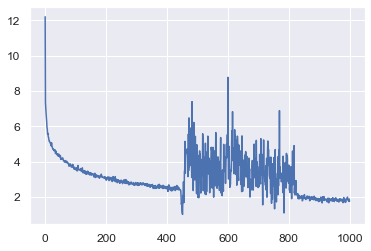

In [44]:
plt.plot(history['gen'])

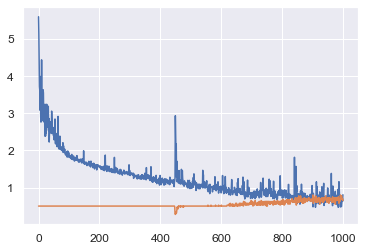

In [45]:
plt.plot(history['dis'])

In [46]:
df1.head()

NameError: name 'df1' is not defined